In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
olimpic = pd.read_csv('olimpic.csv.zip')
region = pd.read_csv('region.csv')


In [3]:
olimpic.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
region.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [17]:
olimpic_merged = olimpic.merge(region, left_on='NOC', right_on='NOC', how='left')

olimpic_merged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [6]:
gold_medals = pd.DataFrame(olimpic_merged[olimpic_merged['Medal'] == 'Gold']).reset_index(drop = True)

gold_medals.pivot_table(index = 'Season',columns = 'Medal',aggfunc='count',values='Name',margins=True).iloc[:,:-1]

Medal,Gold
Season,
Summer,11459
Winter,1913
All,13372


<AxesSubplot:xlabel='Age'>

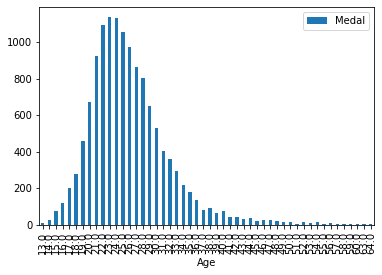

In [7]:
format = lambda x: int(x)
gold_medals['Age'] = gold_medals['Age'].map(format,na_action='ignore')

gold_medals.groupby('Age')[['Medal']].count().plot(kind='bar')

<AxesSubplot:xlabel='Sport'>

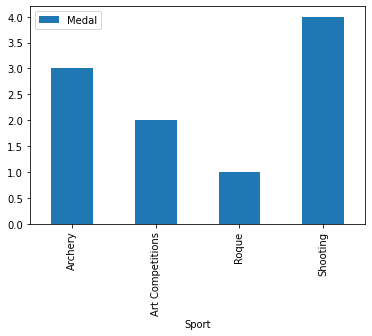

In [8]:
champion_age_sport = pd.DataFrame(gold_medals[gold_medals['Age'] >= 60])

champion_age_sport.groupby('Sport')[['Medal']].count().plot(kind='bar')

<AxesSubplot:xlabel='Year'>

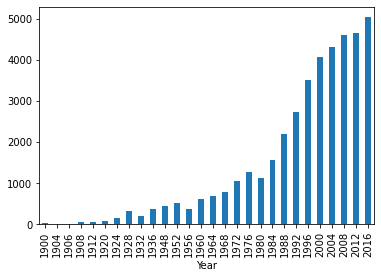

In [9]:
women = olimpic_merged[(olimpic_merged['Sex'] == 'F') & (olimpic_merged['Season'] == 'Summer')]

#women['Name'].nunique()

women.groupby('Year')['ID'].nunique().plot(kind ='bar')

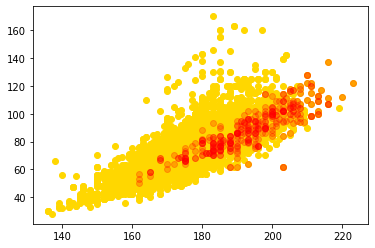

In [10]:
# в виде точек визуализировать зависимость роста и веса для
# золотых медалистов всех видов спорта и выделить точки для только для Баскетбола (Basketball)

# ось х рост ось у вес, выделить цветом золотых медалистов

task7 = gold_medals[['Weight','Height','Sport']]

plt.scatter(task7['Height'],task7['Weight'], color='gold')

task7_basket = task7[task7['Sport']=='Basketball']

plt.scatter(task7_basket['Height'],task7_basket['Weight'],color='red',alpha=0.25)

In [11]:

# отдельная таблица для зимних олимпийских игр с 1956 с 1988 в которой
# перрекодировать медали 'Gold':3 , 'Silver': 2, 'Bronze': 1

# СПИСОК 6 команд набравщих суммарно больше всех баллов в медальном зачете


In [12]:
winter = olimpic_merged[olimpic_merged['Season'] == 'Winter'].set_index('Year').sort_index().loc['1956':'1988']

winter['Medal'] = winter['Medal'].map({'Gold':3,'Silver':2,'Bronze':1})


In [15]:
winter

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1956,20920,Mieczysaw Stefan Chmura,M,22.0,172.0,73.0,Poland,POL,1956 Winter,Winter,Cortina d'Ampezzo,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Poland,NaN
1956,123212,Dmitry Matveyevich Ukolov,M,26.0,175.0,86.0,Soviet Union,URS,1956 Winter,Winter,Cortina d'Ampezzo,Ice Hockey,Ice Hockey Men's Ice Hockey,3.0,Russia,NaN
1956,76345,"John Peter ""Johnny"" Matchefts",M,24.0,170.0,67.0,United States,USA,1956 Winter,Winter,Cortina d'Ampezzo,Ice Hockey,Ice Hockey Men's Ice Hockey,2.0,USA,NaN
1956,128858,"Vivi Anne ""Vivi-Anne"" Wassdahl",F,23.0,NaN,NaN,Sweden,SWE,1956 Winter,Winter,Cortina d'Ampezzo,Alpine Skiing,Alpine Skiing Women's Downhill,NaN,Sweden,NaN
1956,18503,Benot Carrara,M,29.0,NaN,NaN,France,FRA,1956 Winter,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN,France,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,97179,Aleksey Alekseyevich Prokurorov,M,23.0,177.0,72.0,Soviet Union,URS,1988 Winter,Winter,Calgary,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,2.0,Russia,NaN
1988,96863,Thomas Prenzel,M,19.0,173.0,63.0,East Germany,GDR,1988 Winter,Winter,Calgary,Nordic Combined,Nordic Combined Men's Team,NaN,Germany,NaN
1988,55307,Erik Stein Johnsen,M,22.0,NaN,NaN,Norway,NOR,1988 Winter,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN,Norway,NaN


In [20]:
best_countries = list(winter.groupby('Team')['Medal'].sum().sort_values(ascending = False)[:6].index)
best_countries

['Soviet Union',
 'United States',
 'Finland',
 'Sweden',
 'Norway',
 'East Germany']